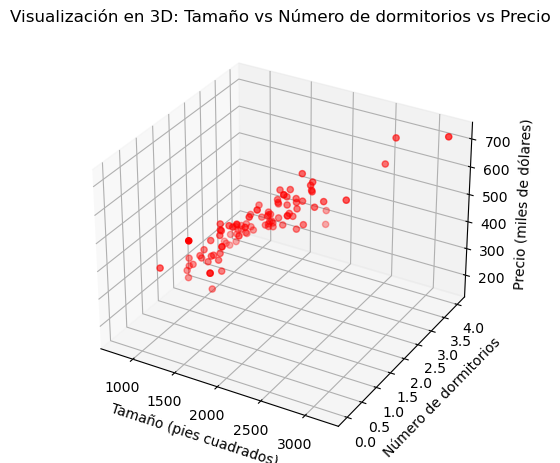

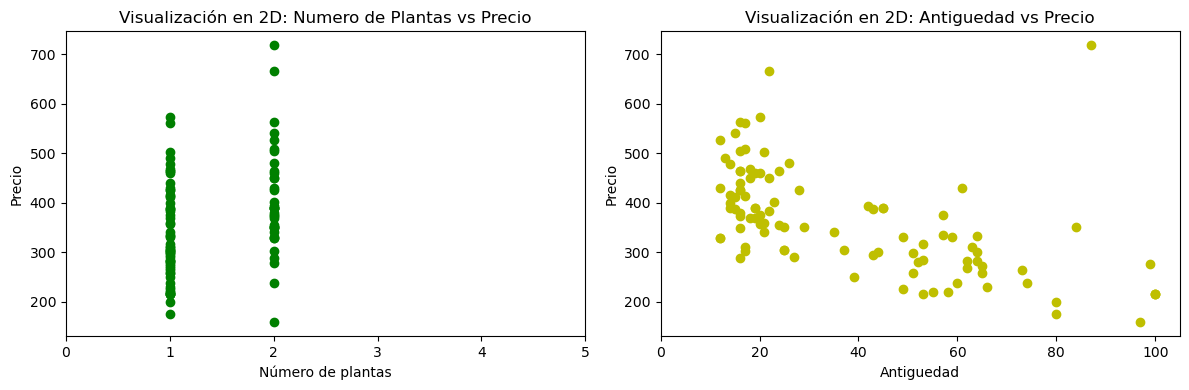

All tests passed!
All tests passed!
[110.55743466 -21.42222135 -32.64944019 -37.81844585] 362.07
sklearn:  [110.55743569 -21.42222187 -32.64944076 -37.81844565] 362.07
[110.55743569 -21.42222187 -32.64944076 -37.81844565] 362.07


In [15]:

import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import multi_linear_reg
from multi_linear_reg import zscore_normalize_features
from multi_linear_reg import compute_cost
from multi_linear_reg import compute_gradient
from multi_linear_reg import gradient_descent
from  public_tests import compute_cost_test
from  public_tests import compute_gradient_test
from  public_tests import sklearn_linearmodel

def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Dividir la línea en valores y convertirlos a números
            values = line.strip().split(',')
            size = float(values[0]) # Tamaño en pies cuadrados
            bedrooms = int(round(float(values[1])))  # Número de dormitorios
            floors = int(round(float(values[2])))  # Número de plantas
            age = int(round(float(values[3])))  # Antigüedad de la casa
            # Convertir el precio a miles de dólares y formatear como cadena con separador de miles

            
            price = float(values[4])
            
            
            # Crear una tupla con los valores y agregarla a la lista de datos
            data.append([size, bedrooms, floors, age, price])

              
    
  
    return data


# # Ejemplo de uso
file_path = 'data/houses.txt'  # Reemplaza 'ruta_del_archivo' con la ruta real de tu archivo
data = load_data(file_path)
data = np.array(data)
X = data[:, :-1]  # Características: Tamaño, Número de dormitorios, Número de plantas, Antigüedad

y = data[:, -1]    # Precio 
y=y.astype(int)



# Visualización en 3D para dos atributos (Tamaño y Número de dormitorios)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1].astype(int), y, c='r', marker='o',)
ax.set_xlabel('Tamaño (pies cuadrados)')
ax.set_ylabel('Número de dormitorios')
ax.set_zlabel('Precio (miles de dólares)')
ax.set_title('Visualización en 3D: Tamaño vs Número de dormitorios vs Precio')

##ax.set_xlim(0, 80)  # Límites del eje x (Tamaño en pies cuadrados)



fig,axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(121)
axs[0].scatter(X[:, 2].astype(int), y, c='g', marker='o')
axs[0].set_xlabel('Número de plantas')
axs[0].set_ylabel('Precio')
axs[0].set_title('Visualización en 2D: Numero de Plantas vs Precio')
axs[0].set_xlim(0, 5)   # Límites del eje x (Antiguedad)

# Visualización en 2D para los otros dos atributos (Antiguedad y Precio)
axs[1].scatter(X[:, 3].astype(int), y, c='y', marker='o')
axs[1].set_xlabel('Antiguedad')
axs[1].set_ylabel('Precio')
axs[1].set_title('Visualización en 2D: Antiguedad vs Precio')
axs[1].set_xlim(0, 105)   # Límites del eje x (Antiguedad)


plt.tight_layout()

plt.show()



Xnorm,mu,sigma = zscore_normalize_features(X);



b_init = 20.181136
w_init = np.array([12.39133, 35.75371, -52.36032, -46.42131])



compute_cost_test(compute_cost)
compute_gradient_test(compute_gradient)

w,b,history= gradient_descent(Xnorm, y, w_init, b_init, compute_cost, compute_gradient, 0.5, 100)



y_pred = np.dot(X, w) + b
print(w,b)
# Ordenar las características y las predicciones


w1,b1 =sklearn_linearmodel(Xnorm, y)
y_pred2 = np.dot(X, w) + b  
print(w1,b1)

# Generar puntos para visualizar el hiperplano en el rango [-10, 10]
x = np.linspace(-10, 10, 400)
y = (-w[0] * x - b) / w[1]

# Visualizar el hiperplano junto con los puntos de datos si es necesario
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'{w[0]}x + {w[1]}y + {b} = 0')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hiperplano en 2D con Pesos y Sesgo del Descenso de Gradiente')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Si tienes puntos de datos X e Y, también puedes visualizarlos
# plt.scatter(X, Y, color='red', marker='o', label='Datos')

plt.show()

##Comprobar que gradient descent funciona y representarlo graficamente , preguntar a ismael si hay que cambiar algo
##Representacion grafica del descenso de gradiente
